<u>

# <span style="color: lightblue; border-bottom: 2px solid lightblue;">**Introduction to Data Science Project**



### **Gal Shmuel & Rachel Yeholashet**

#### **Horse Racing**

#### <span style="border-bottom: 2px solid white;"> **The Problem**


In [1]:
# Installing the Kaggle package
!pip install kaggle


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import json

# Define the path to the token file
token_file_path = 'kaggle.json'

# Read the JSON file and load its contents
with open(token_file_path, 'r') as file:
    kaggle_token = json.load(file)

# Set the Kaggle API credentials in the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_token['username']
os.environ['KAGGLE_KEY'] = kaggle_token['key']

# Now you can use Kaggle API
# For example, to list the datasets you can use the Kaggle API command
# !kaggle datasets list

### [Horsing Racing](https://www.kaggle.com/datasets/hwaitt/horse-racing?select=races_1990.csv)


In [ ]:
import zipfile
import os

# Make sure your kaggle.json file is present in the appropriate directory (usually ~/.kaggle/)
# Replace 'hwaitt/horse-racing' with the dataset owner and dataset name/
!kaggle datasets download -d hwaitt/horse-racing -p ./datasets/horse-racing

# Navigate to the dataset directory
%cd ./datasets/horse-racing

# Specify the path to the downloaded zip file
zip_file = './horse-racing.zip'

# Specify the directory where you want to extract the files
extract_dir = './'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extraction directory to verify extraction
os.listdir(extract_dir)


In [4]:
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install sklearn.metrics

ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### ***Reading from csv file - races2020***

In [6]:
import pandas as pd

races2020 = pd.read_csv('datasets/horse-racing/races_2020.csv')

races2020

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency,distance_km
0,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,Good To Soft,9 hurdles,"[5198.4, 1526.4, 763.2, 381.6]",253.88,7869,3218.0,GB,10,4,NaN,3.218680
1,10896,Cheltenham,03:50,20/01/01,EBF Stallions &amp; Cheltenham Pony Club (A St...,Class 1,NaN,4yo,1m6f,Soft,NaN,"[14237.5, 5342.5, 2675.0, 1332.5, 670.0, 335.0]",206.55,24592,2815.0,GB,5,1,NaN,2.816345
2,23038,Tramore (IRE),02:55,20/01/01,Jerry O'Donovan Memorial Rated Novice Chase,NaN,NaN,5yo+,2m,Soft,12 fences,"[7387.5, 2387.5, 1137.5, 512.5, 262.5, 137.5]",266.40,11826,3218.0,IE,5,0,NaN,3.218680
3,23986,Fairyhouse (IRE),02:40,20/01/01,Follow Fairyhouse On Social Media Beginners Chase,NaN,NaN,5yo+,2m5f,Yielding,13 fences,"[8274.0, 2674.0, 1274.0, 574.0, 294.0, 154.0]",340.90,13244,4223.0,IE,6,0,NaN,4.224518
4,25123,Fairyhouse (IRE),02:05,20/01/01,Fairyhouse Launches New Brand In 2020 Handicap...,NaN,80-109,4yo+,3m,Yielding,13 hurdles,"[7092.0, 2292.0, 1092.0, 492.0, 252.0, 132.0]",389.00,11352,4827.0,IE,6,0,NaN,4.828020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14789,415086,Hanshin (JPN),06:45,20/12/05 00:00,Challenge Cup (Grade 3) (3yo+) (Turf),NaN,NaN,3yo+,1m2f,Firm,NaN,"[287256.19, 111820.64, 69792.46, 43034.64, 284...",119.90,540362,2011.0,JP,8,0,GBP,2.011675
14790,415087,Los Alamitos (USA),10:30,20/12/05 00:00,Starlet Stakes (Grade 1) (2yo Fillies) (Main T...,NaN,NaN,2yo,1m½f,Fast,NaN,"[136466.17, 46240.6, 28195.49, 14661.65, 9022.56]",104.53,234587,1709.5,US,7,0,GBP,1.609340
14791,415088,Nakayama (JPN),06:25,20/12/05 00:00,Sports Nippon Sho Stayers Stakes (Grade 2) (3y...,NaN,NaN,3yo+,2m2f,Good,NaN,"[438217.53, 175775.66, 112181.58, 64551.95, 43...",232.00,833763,3620.0,JP,1,0,GBP,3.621015
14792,415089,Tampa Bay Downs (USA),05:10,20/12/05 00:00,Maiden Claiming Race (2yo) (Turf),NaN,NaN,2yo,1m,Firm,NaN,"[6334.59, 2030.08, 1015.04, 609.02, 101.5, 101...",99.34,10601,1609.0,US,8,0,GBP,1.609340


### ***Converting data***
This function converts the distance frome miles,furlongs to KM!


In [6]:
import re

# Function to normalize the distance string
def normalize_distance_string(distance_str):
    # Replace common encoding issues with the correct character
    return distance_str.replace('Â½', '½')

# Function to convert distance to kilometers
def convert_distance(distance_str):
    # Normalize the distance string
    distance_str = normalize_distance_string(distance_str)
    
    # Function to convert fractional furlongs
    def parse_fraction(fraction_str):
        if '½' in fraction_str:
            return 0.5
        return float(fraction_str)
    
    # Extract miles and furlongs using regular expressions
    miles_match = re.search(r'(\d+)m', distance_str)
    furlongs_match = re.search(r'(\d+½?)f', distance_str)
    
    miles = int(miles_match.group(1)) if miles_match else 0
    furlongs = 0
    if furlongs_match:
        furlongs_str = furlongs_match.group(1).replace('f', '')
        if '½' in furlongs_str:
            furlongs_parts = furlongs_str.split('½')
            furlongs = int(furlongs_parts[0]) + parse_fraction('½')
        else:
            furlongs = int(furlongs_str)
    
    # Convert furlongs to miles (1 furlong = 1/8 mile)
    total_miles = miles + (furlongs / 8.0)
    
    # Convert miles to kilometers (1 mile = 1.60934 km)
    km = total_miles * 1.60934
    return km





### ***Reading from csv file - races2019***

In [ ]:


# List to store DataFrames for each file
df_races = []

# Define the columns to extract
columns_to_extract = ['rid', 'course', 'time', 'title', 'ages', 'distance', 'condition', 'hurdles', 'winningTime']

# Loop through each year and read the corresponding CSV file
for year in years:
    file_path = os.path.join(directory_path, f"races_{year}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        # Extract specific columns
        extracted_df = df[columns_to_extract]


        # Apply the conversion to the 'distance' column
        races2019['distance_km'] = races2019['distance'].apply(convert_distance)

        # Save the updated DataFrame to the same CSV file, overwriting it
        races2019.to_csv('datasets/horse-racing/races_2019.csv', index=False)

        df_races.append(extracted_df)
    else:
        print(f"File for year {year} does not exist.")



# Print extracted data for each year
for i, df in enumerate(df_races):
    print(f"Extracted data from year {2000 + i}:")

# If you want to store the extracted data back in df_horse, it's already done during extraction


In [ ]:

races2019 = pd.read_csv('datasets/horse-racing/races_2019.csv')

# Apply the conversion to the 'distance' column
races2019['distance_km'] = races2019['distance'].apply(convert_distance)

# Save the updated DataFrame to the same CSV file, overwriting it
races2019.to_csv('datasets/horse-racing/races_2019.csv', index=False)

races2019

### **Reading from csv files - Horses 1990 until 2020**

In [7]:
import os
import pandas as pd

# Define the directory path
directory_path = "datasets/horse-racing/"

# Define the range of years
years = range(1990, 2020 + 1)

# List to store DataFrames for each file
df_horse = []

# Define the columns to extract
columns_to_extract = ['rid', 'horseName', 'age', 'isFav', 'trainerName', 'jockeyName', 'position', 'positionL', 'weight']

# Loop through each year and read the corresponding CSV file
for year in years:
    file_path = os.path.join(directory_path, f"horses_{year}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        # Extract specific columns
        extracted_df = df[columns_to_extract]
        df_horse.append(extracted_df)
    else:
        print(f"File for year {year} does not exist.")

# Print extracted data for each year
for i, df in enumerate(df_horse):
    print(f"Extracted data from year {1990 + i}:")

# If you want to store the extracted data back in df_horse, it's already done during extraction


C:\Users\galli\AppData\Local\Temp\ipykernel_15416\3357002413.py:20: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Extracted data from year 1990:
Extracted data from year 1991:
Extracted data from year 1992:
Extracted data from year 1993:
Extracted data from year 1994:
Extracted data from year 1995:
Extracted data from year 1996:
Extracted data from year 1997:
Extracted data from year 1998:
Extracted data from year 1999:
Extracted data from year 2000:
Extracted data from year 2001:
Extracted data from year 2002:
Extracted data from year 2003:
Extracted data from year 2004:
Extracted data from year 2005:
Extracted data from year 2006:
Extracted data from year 2007:
Extracted data from year 2008:
Extracted data from year 2009:
Extracted data from year 2010:
Extracted data from year 2011:
Extracted data from year 2012:
Extracted data from year 2013:
Extracted data from year 2014:
Extracted data from year 2015:
Extracted data from year 2016:
Extracted data from year 2017:
Extracted data from year 2018:
Extracted data from year 2019:
Extracted data from year 2020:


C:\Users\galli\AppData\Local\Temp\ipykernel_15416\3357002413.py:20: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### **The ages Horses compet**

In [8]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


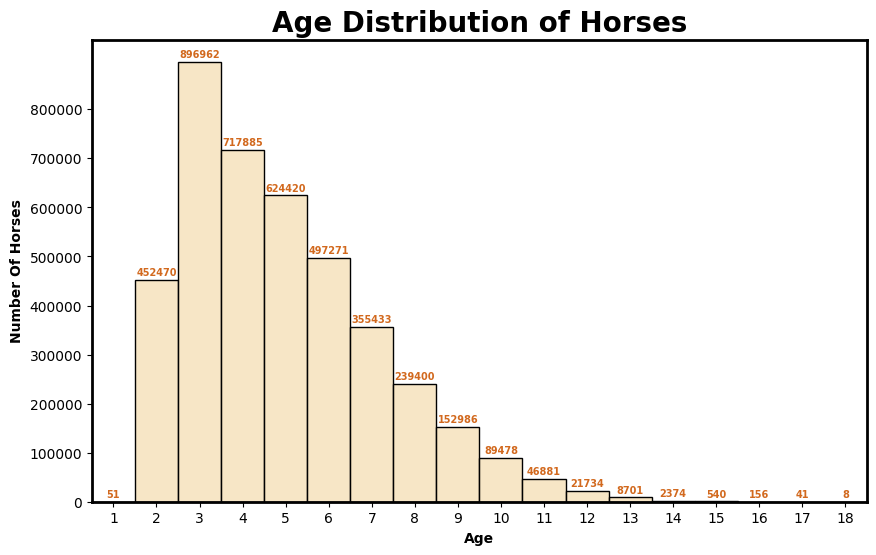

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Concatenate all DataFrames into a single DataFrame for analysis
all_data = pd.concat(df_horse, ignore_index=True)


# Calculate the bins and bin centers
bins = list(range(int(all_data['age'].min()), int(all_data['age'].max()) + 2))  # +2 to include the last edge
bin_centers = 0.5 * (pd.Series(bins[:-1]) + pd.Series(bins[1:]))

# Plot Age Distribution
plt.figure(figsize=(10, 6))
ax = sns.histplot(all_data['age'], bins=bins, kde=False, color='wheat')

# Setting the ticks at the center of each bin
plt.xticks(bin_centers, labels=range(int(all_data['age'].min()), int(all_data['age'].max()) + 1))

# Adjusting the y-axis ticks for smaller increments
max_y = all_data['age'].value_counts().max()
plt.yticks(range(0, max_y + 1, 100000))

# Annotate the bars with the number of horses
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'top', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize = 7, weight='bold', color = 'chocolate')
# Make the plot borders bold
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Set the border line width
    spine.set_edgecolor('black')  # Set the border color

plt.title('Age Distribution of Horses', fontsize = 20,fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Number Of Horses',fontweight='bold')
plt.xlim([1, 19])
plt.savefig('age_distribution.png')
plt.show()


### **Top 10 Trainers Bar Plot**

C:\Users\galli\AppData\Local\Temp\ipykernel_15416\188812286.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=trainer_stats['Total Horses'], y=trainer_stats.index, palette="rocket")


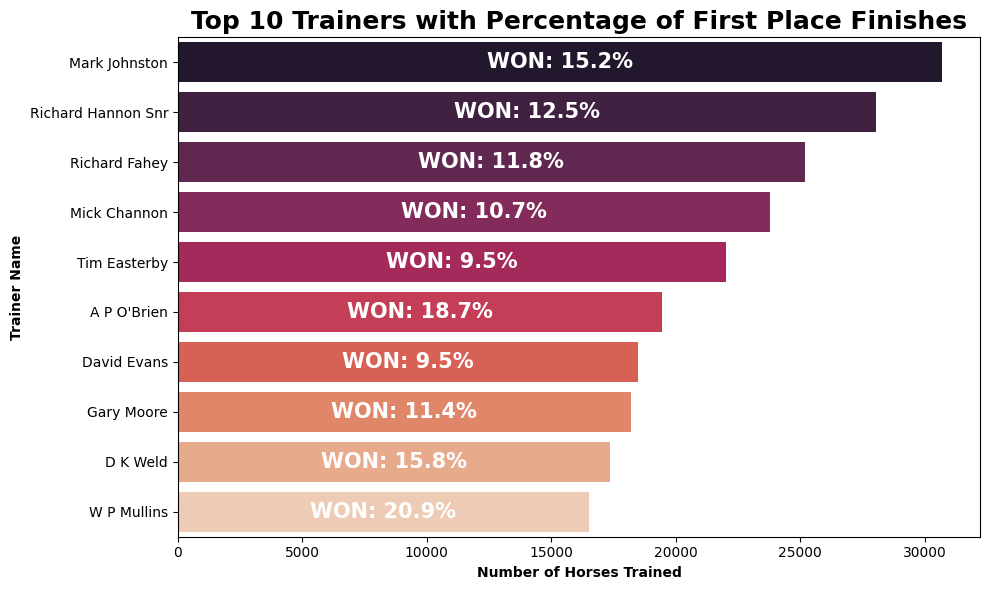

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 trainers based on the number of horses trained
top_trainers = all_data['trainerName'].value_counts().head(10)

# Filter the data to include only rows where the position is 1
winners = all_data[all_data['position'] == 1]

# Count the number of wins for each trainer
trainer_wins = winners['trainerName'].value_counts()

# Merge the top trainers with the number of wins
trainer_stats = pd.DataFrame({
    'Total Horses': top_trainers,
    'Wins': trainer_wins.reindex(top_trainers.index, fill_value=0)
})

# Calculate the percentage of wins
trainer_stats['Percentage'] = (trainer_stats['Wins'] / trainer_stats['Total Horses']) * 100

# Plot
plt.figure(figsize=(10, 6))  
bar_plot = sns.barplot(x=trainer_stats['Total Horses'], y=trainer_stats.index, palette="rocket")

# Add percentage annotations in the middle of each bar
for index, value in enumerate(trainer_stats['Percentage']):
    bar_plot.text(
        trainer_stats['Total Horses'].iloc[index] / 2,  # x position (center of the bar)
        index,  # y position
        f'WON: {value:.1f}%',  # text
        va='center',  # vertical alignment
        ha='center',  # horizontal alignment
        fontsize=15,  # Font size
        weight='bold',
        color='white'
    )

plt.title('Top 10 Trainers with Percentage of First Place Finishes', fontsize=18, fontweight='bold')
plt.xlabel('Number of Horses Trained', fontweight='bold')
plt.ylabel('Trainer Name', fontweight='bold')
plt.tight_layout()  # Adjust layout to fit the plot
plt.savefig('top_trainers_with_percentages.png')
plt.show()


### **Weight vs. Position Scatter Plot**

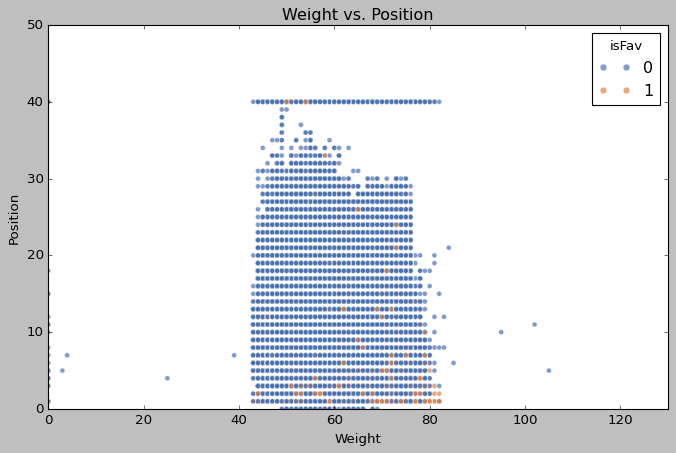

In [54]:
# Weight vs. Position
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='position', data=all_data, hue='isFav', palette="deep", alpha=0.7)
plt.title('Weight vs. Position')
plt.xlabel('Weight')
plt.ylabel('Position')
plt.savefig('weight_vs_position.png')
plt.xlim([0,130])
plt.ylim([0,50])
plt.show()


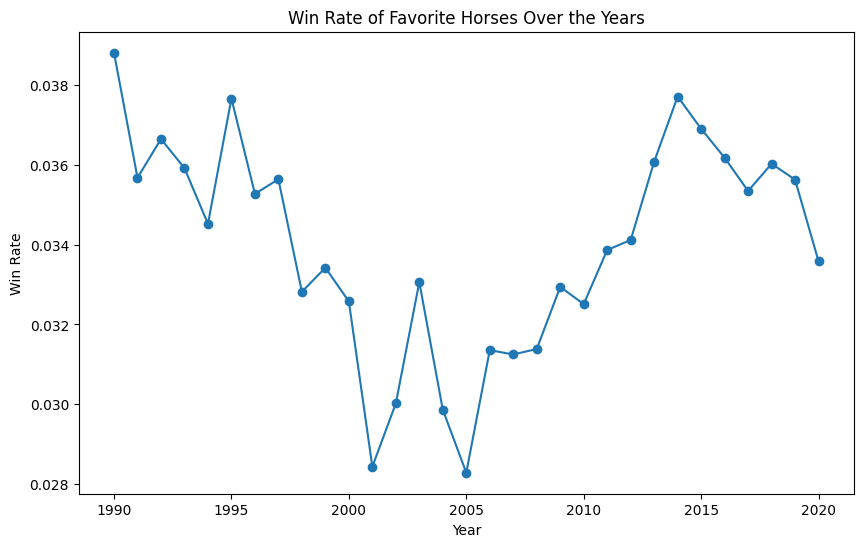

In [94]:
win_rate_by_year = []

for year, df in zip(years, df_horse):
    total_races = len(df)
    wins = len(df[(df['isFav'] == 1) & (df['position'] == 1)])
    win_rate_by_year.append(wins / total_races)

plt.figure(figsize=(10, 6))
plt.plot(years, win_rate_by_year, marker='o')
plt.title('Win Rate of Favorite Horses Over the Years')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.show()


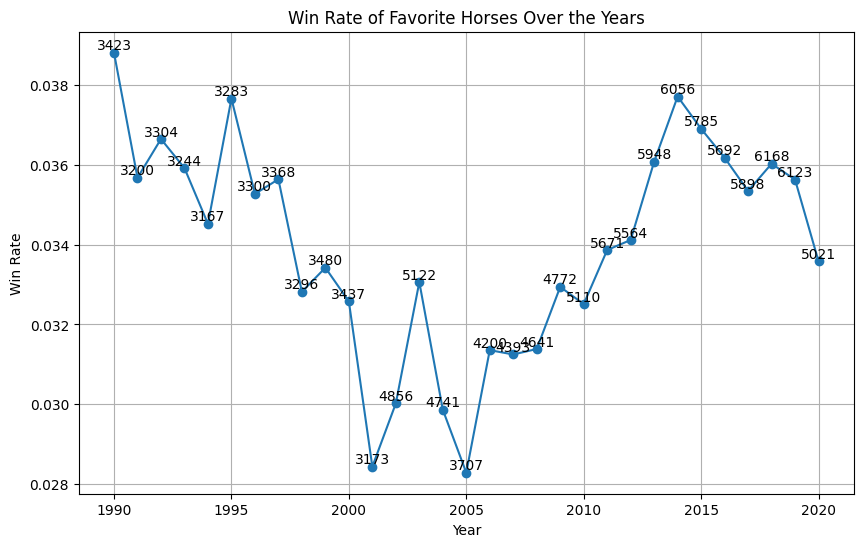

In [102]:
import matplotlib.pyplot as plt

win_rate_by_year = []
num_wins_by_year = []

for year, df in zip(years, df_horse):
    total_races = len(df)
    wins = len(df[(df['isFav'] == 1) & (df['position'] == 1)])
    win_rate_by_year.append(wins / total_races)
    num_wins_by_year.append(wins)

plt.figure(figsize=(10, 6))
plt.plot(years, win_rate_by_year, marker='o')
for i, wins in enumerate(num_wins_by_year):
    plt.text(years[i], win_rate_by_year[i], str(wins), ha='center', va='bottom')

plt.title('Win Rate of Favorite Horses Over the Years')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.grid(True)
plt.show()


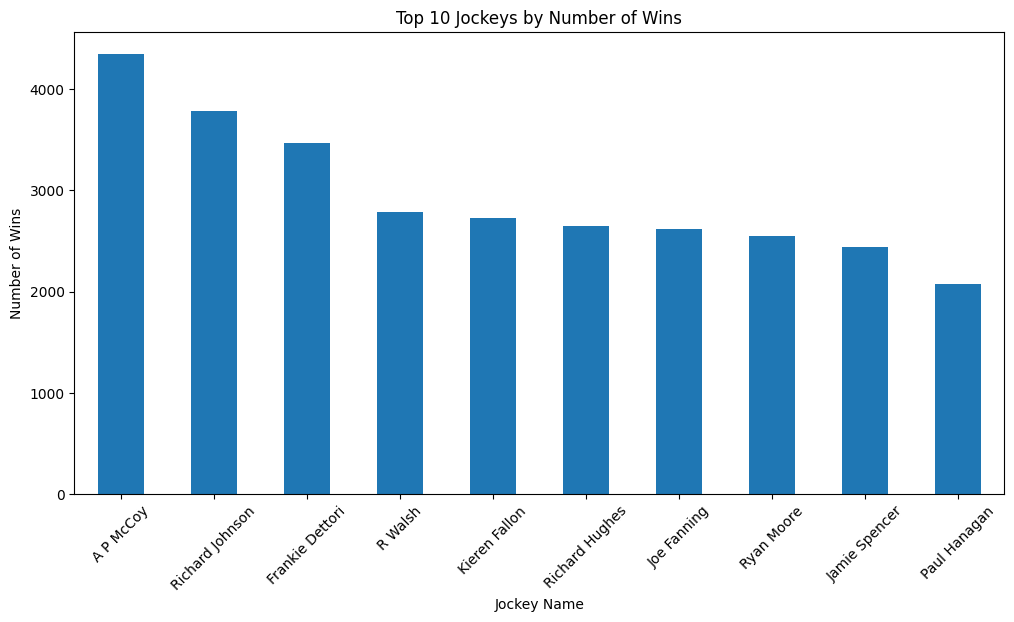

In [100]:
jockey_wins = all_data[all_data['position'] == 1]['jockeyName'].value_counts().head(10)
jockey_wins.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Jockeys by Number of Wins')
plt.xlabel('Jockey Name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


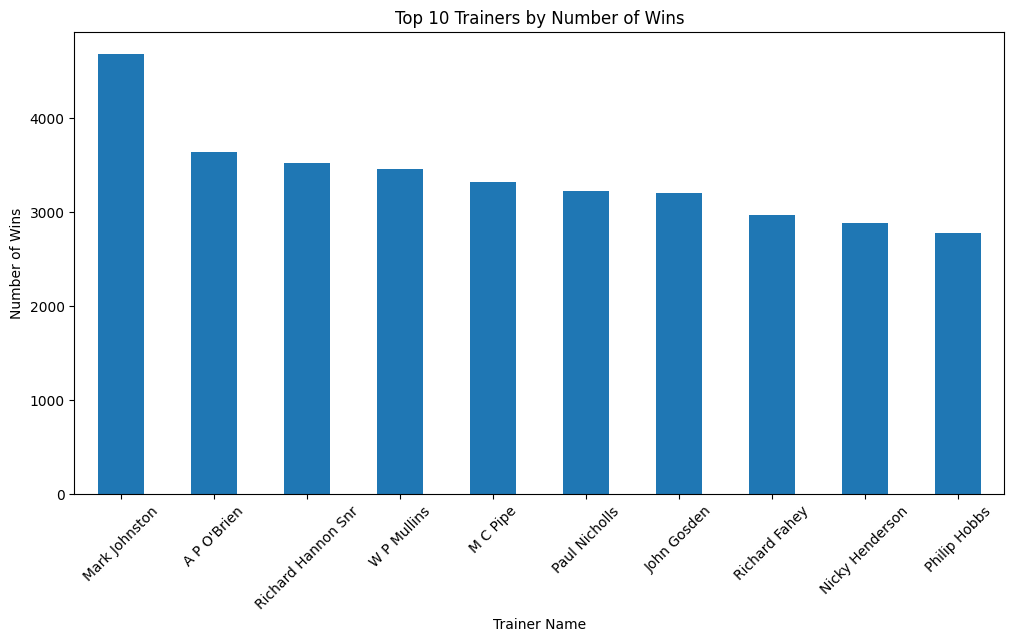

In [98]:
trainer_wins = all_data[all_data['position'] == 1]['trainerName'].value_counts().head(10)
trainer_wins.plot(kind='bar', figsize=(12, 6))
# Annotate the bars with the number of horses

plt.title('Top 10 Trainers by Number of Wins')
plt.xlabel('Trainer Name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


### **Performance of Favorite vs Non-Favorite Horses through the years 1980-2020 :Bar Plot**

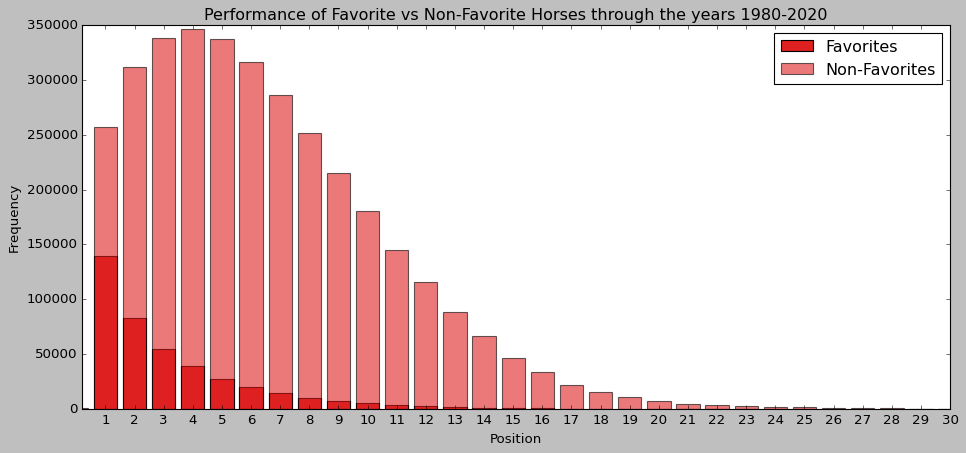

In [67]:
# Performance of Favorite Horses
plt.figure(figsize=(14, 6))
fav_performance = all_data[all_data['isFav'] == True]['position'].value_counts().sort_index()
non_fav_performance = all_data[all_data['isFav'] == False]['position'].value_counts().sort_index()
sns.barplot(x=fav_performance.index, y=fav_performance.values, color='red', label='Favorites')
sns.barplot(x=non_fav_performance.index, y=non_fav_performance.values, color='red', label='Non-Favorites', alpha=0.6)
plt.title('Performance of Favorite vs Non-Favorite Horses through the years 1980-2020')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.legend()
plt.xlim([0.2,30])
plt.savefig('performance_favorites.png')
plt.show()
